# Author

Ronen Huang

# Import Libraries

In [1]:
import os
from bible_search_engine.components.preprocess import NLPTokenizer
from bible_search_engine.components.indexing import BibleChapterIndex
from bible_search_engine.components.ranker import RandomRanker, TFIDFRanker, BM25Ranker, DirichletLMRanker, BiEncoderRanker, ColbertRanker
from bible_search_engine.components.relevance import Relevance
from bible_search_engine.components.l2r import L2RRanker, L2RFeatureExtractor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import orjson
import numpy as np
import joblib

In [2]:
train_queries_path = 'bible_search_engine/bible_queries_relevances/train_queries_relevances.csv'
test_queries_path = 'bible_search_engine/bible_queries_relevances/test_queries_relevances.csv'

In [3]:
eval_ranker = Relevance(test_queries_path)

# Create Bible Chapter Index

In [4]:
nlp_tokenizer = NLPTokenizer()

Device set to use cpu


In [5]:
bible_chapter_index = BibleChapterIndex()
bible_chapter_index.load('bible_search_engine/bible_index_niv')

10650it [00:00, 156411.82it/s]
1189it [00:00, 505271.27it/s]
10650it [00:00, 812997.55it/s]
1189it [00:00, 29673.56it/s]

Loaded Bible Index from bible_search_engine/bible_index_niv


# Evaluate Random Ranker

In [6]:
random_ranker = RandomRanker(bible_chapter_index, nlp_tokenizer)

In [7]:
random_ranker_eval_results = eval_ranker.evaluate_ranker_results(random_ranker)

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 206810.46it/s]


0.06666666666666667

Why should we listen to authority and what are the exceptions?


100%|██████████| 1189/1189 [00:00<00:00, 182347.71it/s]


0.06666666666666667

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 333268.34it/s]


0.06666666666666667

Where did Paul travel to spread the good news?


100%|██████████| 1189/1189 [00:00<00:00, 338700.59it/s]


0.06666666666666667

Who does God want us to reach out to?


100%|██████████| 1189/1189 [00:00<00:00, 383293.17it/s]


0.0

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 324148.68it/s]


0.6

Why did Judas betray Jesus?


100%|██████████| 1189/1189 [00:00<00:00, 1047034.95it/s]


0.06666666666666667

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 317543.93it/s]


0.3333333333333333

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 296970.61it/s]


0.2

Who has received prophecies from God?


100%|██████████| 1189/1189 [00:00<00:00, 296829.20it/s]

0.2



In [8]:
random_ranker_eval_results

[('What did God do to unloyal servants?', 0.06666666666666667),
 ('Why should we listen to authority and what are the exceptions?',
  0.06666666666666667),
 ('How do we get saved and know when we are saved?', 0.06666666666666667),
 ('Where did Paul travel to spread the good news?', 0.06666666666666667),
 ('Who does God want us to reach out to?', 0.0),
 ('What does God say about spirituality?', 0.6),
 ('Why did Judas betray Jesus?', 0.06666666666666667),
 ('How do we face discrimination and injustice?', 0.3333333333333333),
 ('Where do we find comfort and peace?', 0.2),
 ('Who has received prophecies from God?', 0.2)]

# Evaluate TF-IDF Ranker

In [9]:
tf_idf_ranker = TFIDFRanker(bible_chapter_index, nlp_tokenizer)

In [10]:
tf_idf_ranker_eval_results = eval_ranker.evaluate_ranker_results(tf_idf_ranker)

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 66953.45it/s]


0.4666666666666667

Why should we listen to authority and what are the exceptions?


100%|██████████| 1189/1189 [00:00<00:00, 39940.63it/s]


0.8

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 40643.74it/s]


0.6

Where did Paul travel to spread the good news?


100%|██████████| 1189/1189 [00:00<00:00, 54629.01it/s]


0.7333333333333333

Who does God want us to reach out to?


100%|██████████| 1189/1189 [00:00<00:00, 40650.37it/s]


0.2

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 57930.09it/s]


0.5333333333333333

Why did Judas betray Jesus?


100%|██████████| 1189/1189 [00:00<00:00, 121896.45it/s]


0.8

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 60159.32it/s]


0.8

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 55916.53it/s]


0.7333333333333333

Who has received prophecies from God?


100%|██████████| 1189/1189 [00:00<00:00, 50168.78it/s]


0.8



In [11]:
tf_idf_ranker_eval_results

[('What did God do to unloyal servants?', 0.4666666666666667),
 ('Why should we listen to authority and what are the exceptions?', 0.8),
 ('How do we get saved and know when we are saved?', 0.6),
 ('Where did Paul travel to spread the good news?', 0.7333333333333333),
 ('Who does God want us to reach out to?', 0.2),
 ('What does God say about spirituality?', 0.5333333333333333),
 ('Why did Judas betray Jesus?', 0.8),
 ('How do we face discrimination and injustice?', 0.8),
 ('Where do we find comfort and peace?', 0.7333333333333333),
 ('Who has received prophecies from God?', 0.8)]

# Evaluate BM25 Ranker

In [12]:
bm25_ranker = BM25Ranker(bible_chapter_index, nlp_tokenizer)

In [13]:
bm25_ranker_eval_results = eval_ranker.evaluate_ranker_results(bm25_ranker)

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 46607.30it/s]


0.0

Why should we listen to authority and what are the exceptions?


100%|██████████| 1189/1189 [00:00<00:00, 31664.87it/s]


0.0

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 35198.49it/s]


0.0

Where did Paul travel to spread the good news?


100%|██████████| 1189/1189 [00:00<00:00, 39477.76it/s]


0.06666666666666667

Who does God want us to reach out to?


100%|██████████| 1189/1189 [00:00<00:00, 29361.88it/s]


0.06666666666666667

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 40255.62it/s]


0.6666666666666666

Why did Judas betray Jesus?


100%|██████████| 1189/1189 [00:00<00:00, 65918.02it/s]


0.6

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 63495.85it/s]


0.3333333333333333

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 58160.47it/s]


0.2

Who has received prophecies from God?


100%|██████████| 1189/1189 [00:00<00:00, 54532.83it/s]


0.5333333333333333



In [14]:
bm25_ranker_eval_results

[('What did God do to unloyal servants?', 0.0),
 ('Why should we listen to authority and what are the exceptions?', 0.0),
 ('How do we get saved and know when we are saved?', 0.0),
 ('Where did Paul travel to spread the good news?', 0.06666666666666667),
 ('Who does God want us to reach out to?', 0.06666666666666667),
 ('What does God say about spirituality?', 0.6666666666666666),
 ('Why did Judas betray Jesus?', 0.6),
 ('How do we face discrimination and injustice?', 0.3333333333333333),
 ('Where do we find comfort and peace?', 0.2),
 ('Who has received prophecies from God?', 0.5333333333333333)]

## Evaluate Dirichlet LM Ranker

In [15]:
dirichlet_lm_ranker = DirichletLMRanker(bible_chapter_index, nlp_tokenizer)

In [16]:
dirichlet_lm_ranker_eval_results = eval_ranker.evaluate_ranker_results(dirichlet_lm_ranker)

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 55919.04it/s]


0.26666666666666666

Why should we listen to authority and what are the exceptions?


100%|██████████| 1189/1189 [00:00<00:00, 37617.50it/s]


0.5333333333333333

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 42715.80it/s]


0.5333333333333333

Where did Paul travel to spread the good news?


100%|██████████| 1189/1189 [00:00<00:00, 50141.04it/s]


0.5333333333333333

Who does God want us to reach out to?


100%|██████████| 1189/1189 [00:00<00:00, 44417.18it/s]


0.4

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 55297.75it/s]


0.6

Why did Judas betray Jesus?


100%|██████████| 1189/1189 [00:00<00:00, 66938.17it/s]


0.8

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 39270.41it/s]


0.5333333333333333

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 40594.11it/s]


0.6

Who has received prophecies from God?


100%|██████████| 1189/1189 [00:00<00:00, 50028.36it/s]


0.8666666666666667



In [17]:
dirichlet_lm_ranker_eval_results

[('What did God do to unloyal servants?', 0.26666666666666666),
 ('Why should we listen to authority and what are the exceptions?',
  0.5333333333333333),
 ('How do we get saved and know when we are saved?', 0.5333333333333333),
 ('Where did Paul travel to spread the good news?', 0.5333333333333333),
 ('Who does God want us to reach out to?', 0.4),
 ('What does God say about spirituality?', 0.6),
 ('Why did Judas betray Jesus?', 0.8),
 ('How do we face discrimination and injustice?', 0.5333333333333333),
 ('Where do we find comfort and peace?', 0.6),
 ('Who has received prophecies from God?', 0.8666666666666667)]

# Evaluate Bi-Encoder Ranker

In [18]:
encoded_chapters = np.load('bible_search_engine/bible_data/encoded_chapters_niv.npy')
with open('bible_search_engine/bible_data/chapterids_niv.json', 'rb') as chapterids_file:
    chapter_ids = orjson.loads(chapterids_file.readline())

In [19]:
bi_encoder_ranker = BiEncoderRanker('msmarco-distilbert-dot-v5', encoded_chapters, chapter_ids)

In [20]:
bi_encoder_ranker_eval_results = eval_ranker.evaluate_ranker_results(bi_encoder_ranker)

What did God do to unloyal servants?


6937it [00:00, 1317211.59it/s]


0.26666666666666666

Why should we listen to authority and what are the exceptions?


6937it [00:00, 1852297.35it/s]


0.4666666666666667

How do we get saved and know when we are saved?


6937it [00:00, 1731382.73it/s]


0.4666666666666667

Where did Paul travel to spread the good news?


6937it [00:00, 3462147.41it/s]


0.6

Who does God want us to reach out to?


6937it [00:00, 3464620.96it/s]


0.4

What does God say about spirituality?


6937it [00:00, 3465033.57it/s]


0.6666666666666666

Why did Judas betray Jesus?


6937it [00:00, 3464620.96it/s]


0.5333333333333333

How do we face discrimination and injustice?


6937it [00:00, 3464620.96it/s]


0.5333333333333333

Where do we find comfort and peace?


6937it [00:00, 1852887.15it/s]


0.6666666666666666

Who has received prophecies from God?


6937it [00:00, 1732104.23it/s]


0.5333333333333333



In [21]:
bi_encoder_ranker_eval_results

[('What did God do to unloyal servants?', 0.26666666666666666),
 ('Why should we listen to authority and what are the exceptions?',
  0.4666666666666667),
 ('How do we get saved and know when we are saved?', 0.4666666666666667),
 ('Where did Paul travel to spread the good news?', 0.6),
 ('Who does God want us to reach out to?', 0.4),
 ('What does God say about spirituality?', 0.6666666666666666),
 ('Why did Judas betray Jesus?', 0.5333333333333333),
 ('How do we face discrimination and injustice?', 0.5333333333333333),
 ('Where do we find comfort and peace?', 0.6666666666666666),
 ('Who has received prophecies from God?', 0.5333333333333333)]

# Evaluate L2R Ranker

In [22]:
chapter_ids = []
chapter_texts = []
with open("bible_search_engine/bible_data/old_testament_niv.jsonl") as old_testament_file:
    for bible_chapter_line in tqdm(old_testament_file):
        bible_chapter = orjson.loads(bible_chapter_line)
        chapter_ids.append(bible_chapter["chapterid"])
        chapter_texts.append(" ".join(bible_chapter["verses"].values()))
with open("bible_search_engine/bible_data/new_testament_niv.jsonl") as new_testament_file:
    for bible_chapter_line in tqdm(new_testament_file):
        bible_chapter = orjson.loads(bible_chapter_line)
        chapter_ids.append(bible_chapter["chapterid"])
        chapter_texts.append(" ".join(bible_chapter["verses"].values()))

929it [00:00, 29068.66it/s]
260it [00:00, 35540.32it/s]


In [23]:
colbert_ranker = ColbertRanker("colbert-ir/colbertv2.0", "bible_chapters")

In [24]:
l2r_feature_extractor = L2RFeatureExtractor(bible_chapter_index, nlp_tokenizer, tf_idf_ranker, bm25_ranker, dirichlet_lm_ranker, colbert_ranker)

In [25]:
l2r_ranker = L2RRanker(bible_chapter_index, nlp_tokenizer, bi_encoder_ranker, l2r_feature_extractor)
l2r_ranker.lightgbm_ranker = joblib.load("bible_search_engine/initial_ranker_niv.pkl")

In [26]:
l2r_ranker_eval_results = eval_ranker.evaluate_ranker_results(l2r_ranker)

What did God do to unloyal servants?


6937it [00:00, 2465962.10it/s]
100%|██████████| 100/100 [00:01<00:00, 70.60it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.6666666666666666

Why should we listen to authority and what are the exceptions?


6937it [00:00, 2160853.09it/s]
100%|██████████| 100/100 [00:01<00:00, 85.43it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.5333333333333333

How do we get saved and know when we are saved?


6937it [00:00, 2309197.37it/s]
100%|██████████| 100/100 [00:01<00:00, 89.94it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.6

Where did Paul travel to spread the good news?


6937it [00:00, 3465859.06it/s]
100%|██████████| 100/100 [00:01<00:00, 94.23it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.7333333333333333

Who does God want us to reach out to?


6937it [00:00, 2308830.89it/s]
100%|██████████| 100/100 [00:01<00:00, 83.47it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.4

What does God say about spirituality?


6937it [00:00, 3465033.57it/s]
100%|██████████| 100/100 [00:01<00:00, 87.95it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.8666666666666667

Why did Judas betray Jesus?


6937it [00:00, 1731898.03it/s]
100%|██████████| 100/100 [00:01<00:00, 87.03it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.5333333333333333

How do we face discrimination and injustice?


6937it [00:00, 2309014.11it/s]
100%|██████████| 100/100 [00:01<00:00, 84.55it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.8666666666666667

Where do we find comfort and peace?


6937it [00:00, 3465033.57it/s]
100%|██████████| 100/100 [00:01<00:00, 86.57it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.8

Who has received prophecies from God?


6937it [00:00, 3983009.84it/s]
100%|██████████| 100/100 [00:01<00:00, 93.85it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
0.7333333333333333



In [27]:
l2r_ranker_eval_results

[('What did God do to unloyal servants?', 0.6666666666666666),
 ('Why should we listen to authority and what are the exceptions?',
  0.5333333333333333),
 ('How do we get saved and know when we are saved?', 0.6),
 ('Where did Paul travel to spread the good news?', 0.7333333333333333),
 ('Who does God want us to reach out to?', 0.4),
 ('What does God say about spirituality?', 0.8666666666666667),
 ('Why did Judas betray Jesus?', 0.5333333333333333),
 ('How do we face discrimination and injustice?', 0.8666666666666667),
 ('Where do we find comfort and peace?', 0.8),
 ('Who has received prophecies from God?', 0.7333333333333333)]

# Plot Ranker Results

In [28]:
rankers = ['Random'] * len(random_ranker_eval_results) + ['TF-IDF'] * len(tf_idf_ranker_eval_results) +\
    ['BM25'] * len(bm25_ranker_eval_results) + ['Dirichlet LM'] * len(dirichlet_lm_ranker_eval_results) +\
    ['Bi-Encoder'] * len(bi_encoder_ranker_eval_results) + ['L2R'] * len(l2r_ranker_eval_results)
ranker_types = ['Baseline'] * (len(random_ranker_eval_results) * 5) + ['Bible Search Engine'] * (len(l2r_ranker_eval_results))
precisions = [precision for _, precision in random_ranker_eval_results] + [precision for _, precision in tf_idf_ranker_eval_results] +\
    [precision for _, precision in bm25_ranker_eval_results] + [precision for _, precision in bm25_ranker_eval_results] +\
    [precision for _, precision in dirichlet_lm_ranker_eval_results] + [precision for _, precision in l2r_ranker_eval_results]
queries = [query for query, _ in random_ranker_eval_results] * 6

if not os.path.isdir('rankers'):
    os.mkdir('rankers')
rankers_results = pd.DataFrame({'Ranker': rankers, 'Ranker Type': ranker_types, 'Precision at 15': precisions, 'Query': queries})
rankers_results.to_csv('rankers/results.csv', index=None)
rankers_results

,Ranker,Ranker Type,Precision at 15,Query
0,Random,Baseline,0.066667,What did God do to unloyal servants?
1,Random,Baseline,0.066667,Why should we listen to authority and what are...
2,Random,Baseline,0.066667,How do we get saved and know when we are saved?
3,Random,Baseline,0.066667,Where did Paul travel to spread the good news?
4,Random,Baseline,0.000000,Who does God want us to reach out to?
5,Random,Baseline,0.600000,What does God say about spirituality?
6,Random,Baseline,0.066667,Why did Judas betray Jesus?
7,Random,Baseline,0.333333,How do we face discrimination and injustice?
8,Random,Baseline,0.200000,Where do we find comfort and peace?
9,Random,Baseline,0.200000,Who has received prophecies from God?


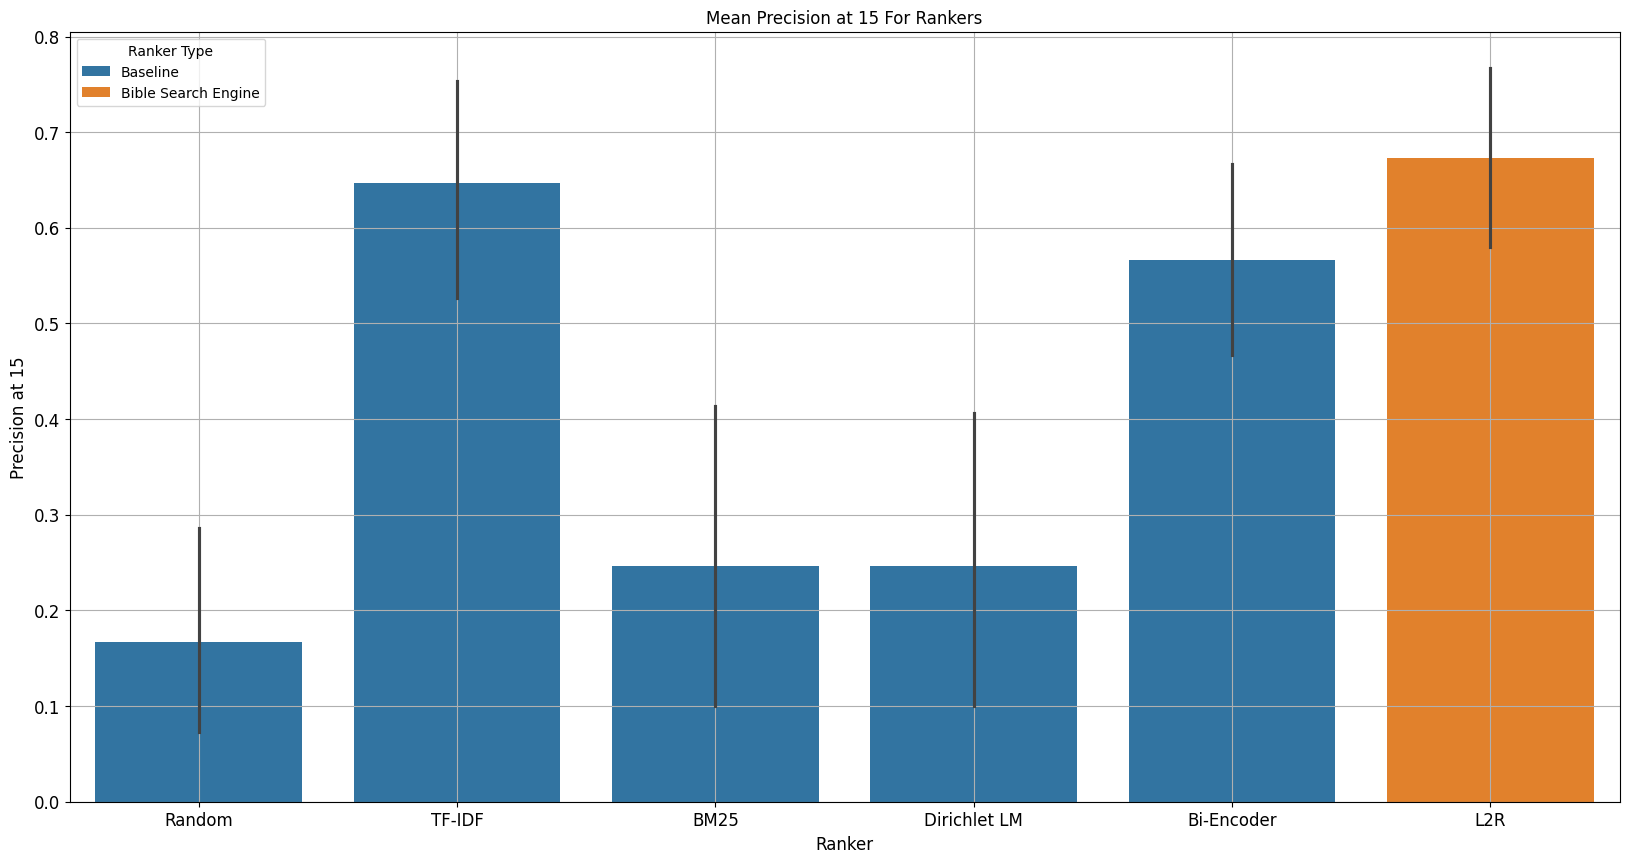

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
ranker_results_plot = sns.barplot(rankers_results, x='Ranker', y='Precision at 15', hue='Ranker Type')
plt.title('Mean Precision at 15 For Rankers', fontsize='large')
sns.move_legend(ranker_results_plot, 'upper left')
plt.xlabel('Ranker', fontsize='large')
plt.ylabel('Precision at 15', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
ax.grid()
plt.savefig('rankers/results.jpg', dpi=500, bbox_inches='tight')
plt.show()